## Task: Classification using decision tree classifier and its visualization

### Import Libraries

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_iris
from sklearn import tree
import seaborn as sns

### Download the dataset

In [32]:
iris = load_iris()

In [33]:
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

### Let us check the fields of dataset.Identify features and labels

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


### Check for null values

In [35]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

### Check for duplicates

In [36]:
df[df.duplicated()]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
142,5.8,2.7,5.1,1.9,2.0


### 1 duplicate row.So drop it

In [37]:
df.drop_duplicates(inplace=True)

In [38]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


### Check number of classes/species

In [39]:
df['target'].value_counts()

1.0    50
0.0    50
2.0    49
Name: target, dtype: int64

### 5 point summary

In [40]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.843624,3.059732,3.748993,1.194631,0.993289
std,0.830851,0.436342,1.767791,0.762622,0.817847
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.300000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### From 5 point summary,dataset appear to be one that satisfies symmetry.

### Checking for imbalance in the dataset.Dataset appears to be balanced

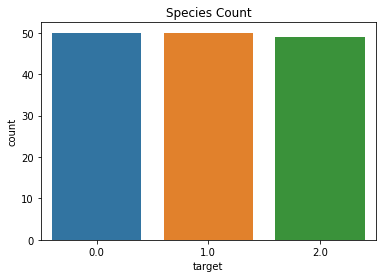

In [41]:
plt.title('Species Count')
sns.countplot(df['target']);

### Pairplot to visualize data distribution and clusters

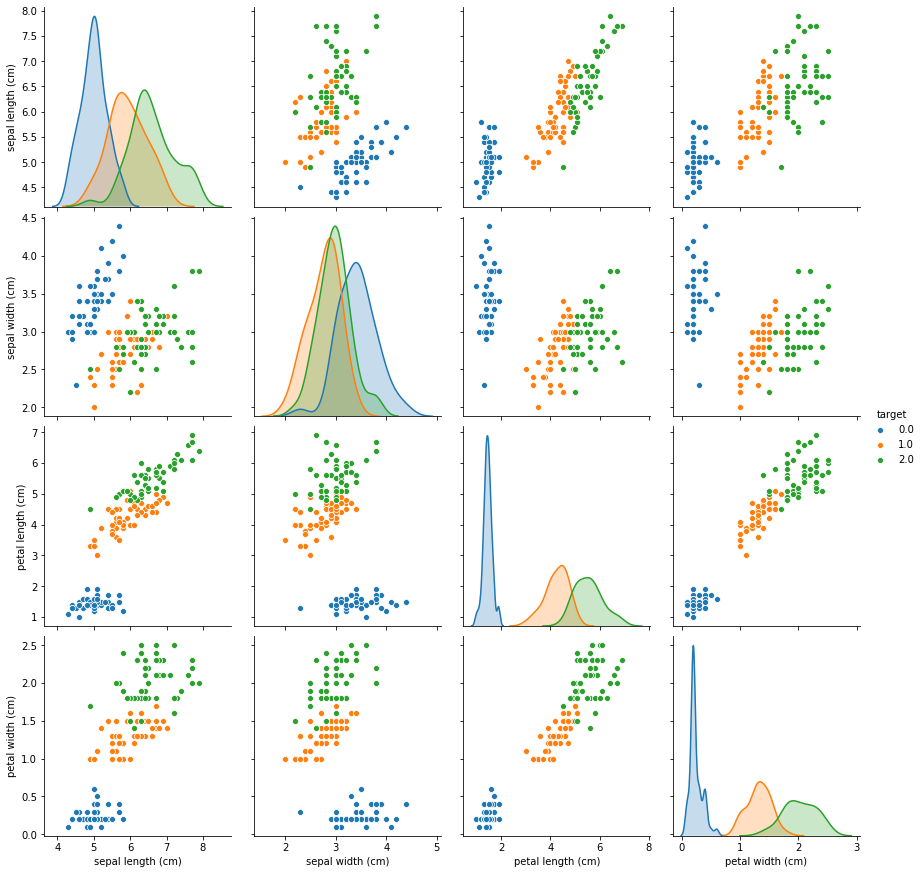

In [42]:
sns.pairplot(df,hue="target",height=3);

### Pairplot shows distribution and good demarkation of clusters

### Examine Correlation

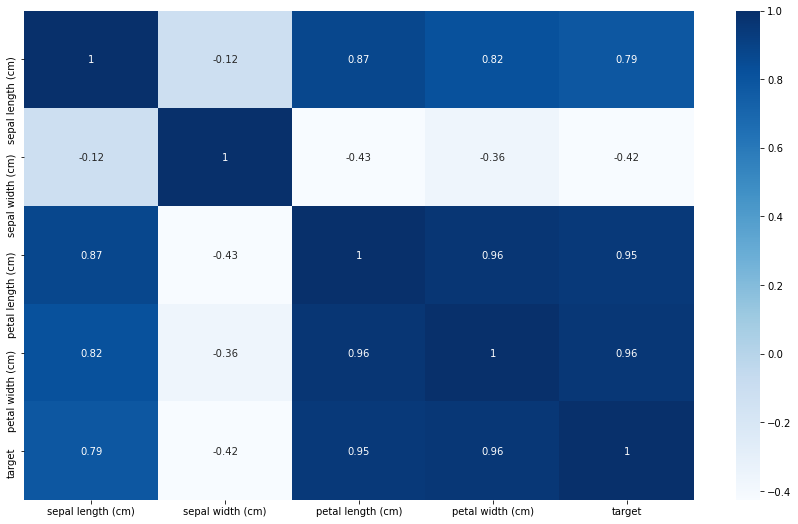

In [43]:
fig = plt.figure(figsize = (15,9))
sns.heatmap(df.corr(), cmap='Blues', annot = True);

### Correlation heatmap shows high correlation between features except for sepal width with other fields.

### Univariate Analysis

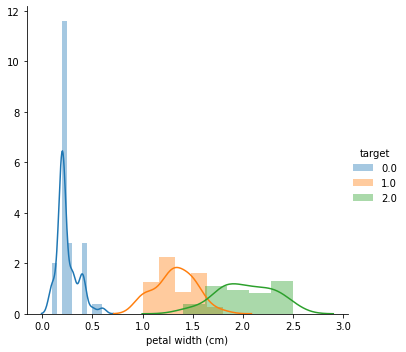

In [44]:
sns.FacetGrid(df,hue="target",height=5).map(sns.distplot,"petal width (cm)").add_legend();

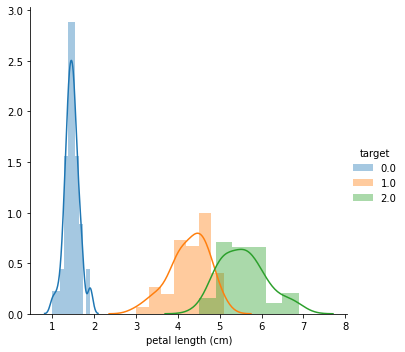

In [45]:
sns.FacetGrid(df,hue="target",height=5).map(sns.distplot,"petal length (cm)").add_legend();

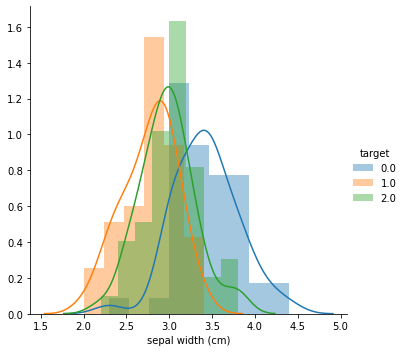

In [46]:
sns.FacetGrid(df,hue="target",height=5).map(sns.distplot,"sepal width (cm)").add_legend();

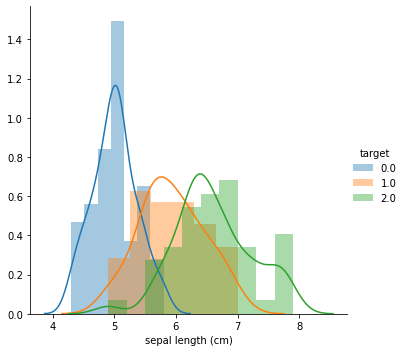

In [47]:
sns.FacetGrid(df,hue="target",height=5).map(sns.distplot,"sepal length (cm)").add_legend();

### From the univariate analysis we can see that petal length and petal width are better criteria's for separating classes/labels.We can later on see that petal width is the best criteria/root node that the decision tree classifier uses while constructing the decision tree based on GINI Index.

### As all the features and labels are numeric,it can be splitted to features and labels without encoding

In [48]:
X=df.iloc[:,0:4].values
y=df.iloc[:,4].values

### Apply the decision tree classifier

In [49]:
clf = tree.DecisionTreeClassifier()

In [50]:
clf=clf.fit(X,y)

### Visualization of decision tree

### Assumptions: In the beginning, the whole training set is considered as the root.  Records are distributed recursively on the basis of attribute values.

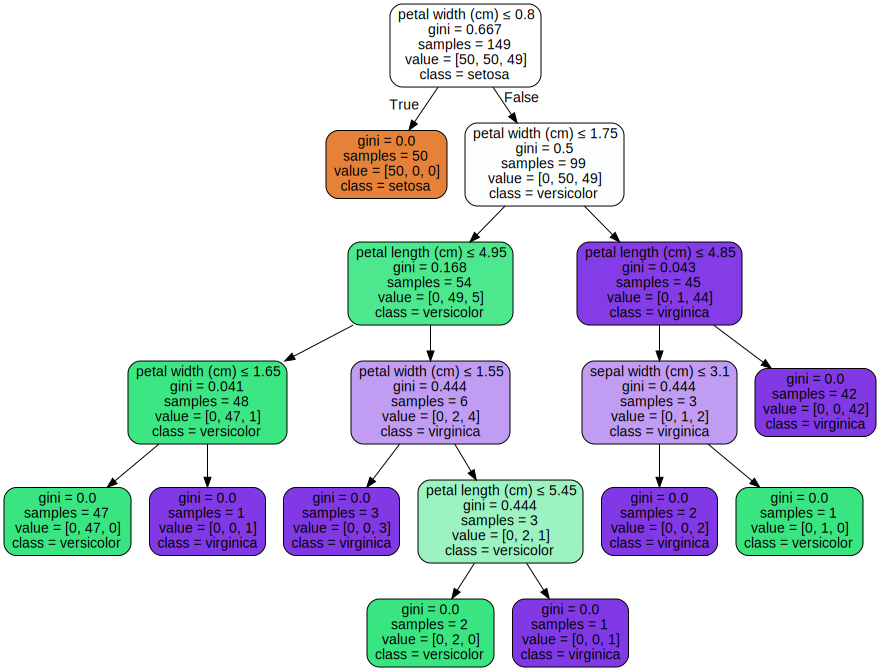

In [51]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                  feature_names=iris.feature_names,  
                      class_names=iris.target_names,  
                     filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data,format="png")  
graph 

### Node split happens based on Gini Index here.Gini Index/Gini Impurity value ranges from 0 to 1.Gini Index of 0 means that node contains data belonging to only one class/no impurity/pure class.Gini Index of 1 means it randomly contains data belonging to various classes.Gini Index of 0.5 means that node contains data belonging to both classes uniformly. 

C:\Anaconda\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


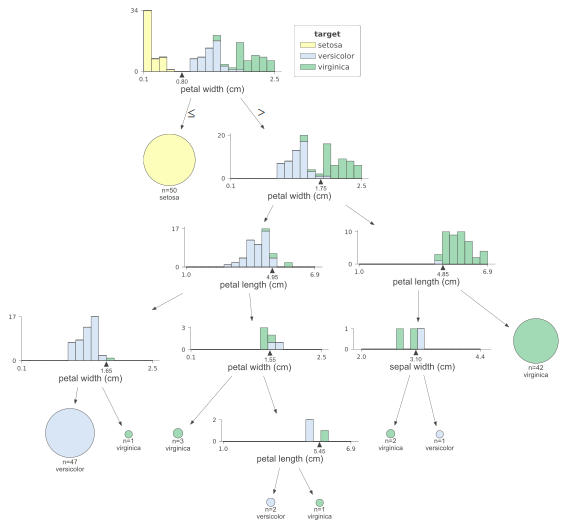

<Figure size 3600x3600 with 0 Axes>

In [52]:
from dtreeviz.trees import dtreeviz # remember to load the package
plt.figure(figsize=(50,50))
viz = dtreeviz(clf, X, y,
                target_name="target",
                feature_names=iris.feature_names,
                class_names=list(iris.target_names))

viz

### Decision Trees
### Advantages:

### 1. Simple to implement and does not requires extensive data preparation
### 2. No normalization and scaling required
### 3. Missing values does not affect process of building trees.

### Disadvantages

### 1. High training time
### 2. A small change in data can cause large change in decision trees causing instability.
### 3. A single decision tree may not be accurate enough in most of the real-time use cases,hence we go for ensemble of trees or Random Forest for better accuracy.